<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_05/loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 損失関数
損失関数は、誤差を定義する関数です。   
今回は、二乗和誤差と交差エントロピー誤差、２つの損失関数を解説します。

## ●二乗和誤差
出力値と正解値の差を二乗し、全ての出力層のニューロンで総和をとったものを**二乗和誤差**と呼びます。  
二乗和誤差は、$E$を誤差、$y_k$を出力層の各出力値、$t_k$を正解値として以下の式で定義されます。

$$ E = \frac{1}{2} \sum_{k}(y_k-t_k)^2 $$

$y_k$と$t_k$の差を二乗し、全ての出力層のニューロンで総和をとり1/2をかけています。  
後にで改めて解説しますが、1/2をかけるのは微分の際に扱いやすくするためです。

二乗和誤差を用いることにより、ニューラルネットワークの出力がどの程度正解と一致しているかを定量化することができます。  
二乗和誤差は正解や出力が連続的な数値であるケースに向いているため、回帰問題でよく使用されます。

二乗誤差は、Numpyのsum関数、square関数を用いて次のように実装することができます。  

In [7]:
import numpy as np

def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y - t))

squre_sum関数により二乗和誤差を計算します。  
引数のyは出力で、tが正解になります。

この関数をテストしてみましょう。  

In [8]:
import numpy as np

def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y - t))

y = np.array([2, 2, 2, 2])
t = np.array([1, 1, 1, 1])
print(square_sum(y, t))

2.0


出力yは2が4つの配列で、正解tは1が4つの配列です。  
これらの差の総和は4ですが、これを2で割っているので、関数の返り値は2になります。  
square_sum関数が問題なく二乗和誤差を計算できていることが確認できました。  

## ●交差エントロピー誤差
**交差エントロピー誤差**は二つの分布の間のズレを表す尺度で、分類問題でよく使用されます。  
交差エントロピー誤差は、以下の式のように、出力$y_k$の対数と正解値の積の総和を、マイナスにしたもので表されます。

（式 1）
$$ E = - \sum_{k}t_k \log (y_k) $$

自然対数については、以前のセクションで解説しています。  
それでは、（式 1）の意味を解説します。  
まず、この式を次のように変形します。

（式 2）
$$ E = \sum_{k}t_k (-\log (y_k)) $$

分類問題における正解値は、1が1つで残りが0のone-hot表現になります。  
従って、右辺のシグマ内で$t_k$が1の項のみ誤差に影響を与えることになり、$t_k$が0の項の影響は無視されます。  
その結果、正解値が1のたった一つの項しか誤差に影響を与えないことになります。

$-\log (y_k)$に関しては、グラフで考えてみましょう。$y = -\log x$をグラフで表すと次のようになります。

**（図: 負の自然対数）**
<br>



<ipython-input-9-0602ed172522>:7: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


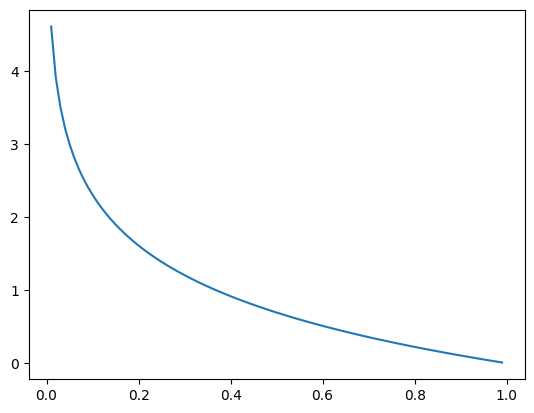

In [9]:
# y=-logxを図示する
import matplotlib.pyplot as plt
import numpy as np

# 0 から１まで0.01ずつ
x = np.arange(0.0, 1.0, 0.01)
y = -np.log(x)
plt.plot(x, y)

$-\log x$は$x$が1の時は0で、$x$が0に近づくにつれて無限に大きくなります。  
この$-\log x$の性質により、$-\log (y_k)$は正解に近づくほど小さくなり、正解から離れるにつれてどこまでも大きくなります。  
従って、（式 2）は出力が正解から離れるほど誤差がどこまでも大きくなり、出力が正解に近づくほど誤差が0に近づくことを意味します。

交差エントロピーの利点の一つは、出力値と正解値の隔離が大きい時に学習速度が速い点です。  
上記の図からも分かる通り、**出力が正解と隔離すると誤差が無限に向かって増大するように定義されているので、このような場合学習速度がとても速くなり隔離が大きく解消されます。**

交差エントロピー誤差は、Numpyのsum関数、及び自然対数を計算するlog関数を用いて次のように実装することができます。  

In [10]:
import numpy as np

def cross_entropy(y, t):  # 出力、正解
    return - np.sum(t * np.log(y + 1e-7))

log関数の中身が0になると、自然対数が無限小に発散してしまい計算を続けることができなくなってしまうので、それを防ぐために`y`に微小な値`1e-7`を加えています。